# Datos

##### Javier Valle, Carnet 20159, Sección 20

In [2]:
# Imports necesarios.
import numpy as np

### Task 1.1: Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

In [3]:
# Cargando la data a un array de numpy.

# Abriendo el csv y cargando los datos a un array.
data = np.genfromtxt('data.csv', delimiter=',')

# Imprimiendo la data.
#print(data)

# Cargando los datos a un np.array.
data = np.array(data)

#data


# Columna de precios.

# Imprimiendo los datos de la segunda columna.
data[:,2] # Columna de precios.

# Quitando los NaN de la segunda columna.
data = data[~np.isnan(data[:,2])]

data[:,2] # Columna de precios sin el NaN.

# Columna de sqft_living.

data[:,5] # Columna de sqft_living.

# Quitando los NaN de la quinta columna.
data = data[~np.isnan(data[:,5])]

data[:,5] # Columna de sqft_living sin el NaN.


array([1180., 2570.,  770., ..., 1020., 1600., 1020.])

# Task 1.2: Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

Precios:  [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
Sqft_living [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]


c:\Users\sebas\Documents\GitHub\HT3-IA\quad.py:2: RuntimeWarning: overflow encountered in square
  cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\sebas\Documents\GitHub\HT3-IA\quad.py:3: RuntimeWarning: overflow encountered in matmul
  grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)
c:\Users\sebas\Documents\GitHub\HT3-IA\linreg.py:14: RuntimeWarning: invalid value encountered in subtract
  t -= a * grad(X, y, t)


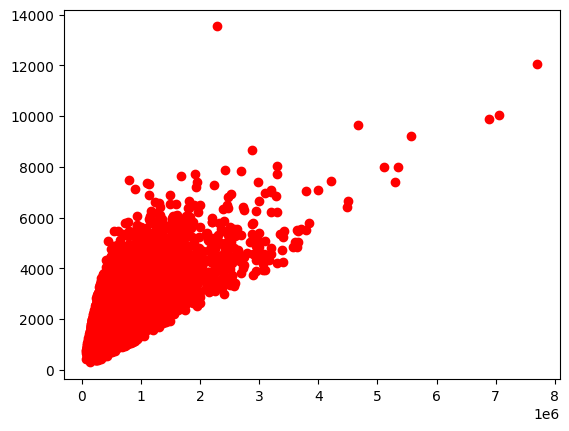

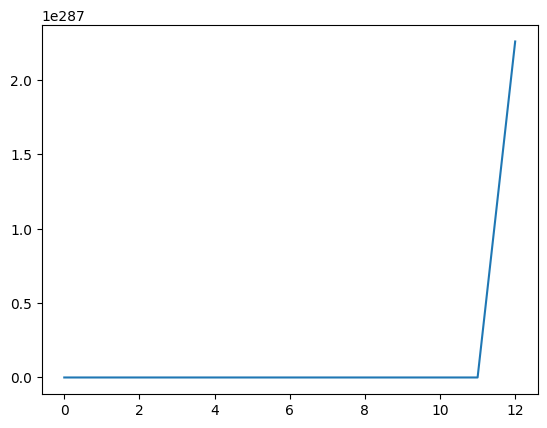

In [4]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,2]

# Sqft_living.
y = data[:,5]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((len(X), 1))
y = y.reshape((len(y), 1))

print("Precios: ", X)
print("Sqft_living", y)

# Calculando Xr.
Xr = np.hstack((
    np.ones((len(X), 1)),
    X.reshape((len(X), 1))
))

# Haciendo reshape a Xr.
Xr = Xr.reshape((len(Xr), 2))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y.reshape((len(y), 1)),
    to,
    q.cost,
    q.grad,
    a=0.05,
    n=100
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# # Haciendo reshape a xmr.
# xmr = xmr.reshape((len(xmr), 2))

# # Haciendo reshape a tf.

ym = xmr @ tf # Pendiente de la recta a utilizar.

# Graficando los resultados.
plt.plot(Xr[:, 1], y, "ro")
plt.plot(xm, ym)
plt.show()

# Gráfica de costos.
plt.plot(costs)
plt.show()

# Task 1.3: Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

Precios:  [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
Sqft_living [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]


c:\Users\sebas\Documents\GitHub\HT3-IA\linregv.py:5: RuntimeWarning: overflow encountered in square
  norm = lambda v: (sum(v**2))**0.5
C:\Users\sebas\AppData\Local\Temp\ipykernel_16880\226440535.py:61: RuntimeWarning: invalid value encountered in matmul
  ym = xmr @ tf # Pendiente de la recta a utilizar.


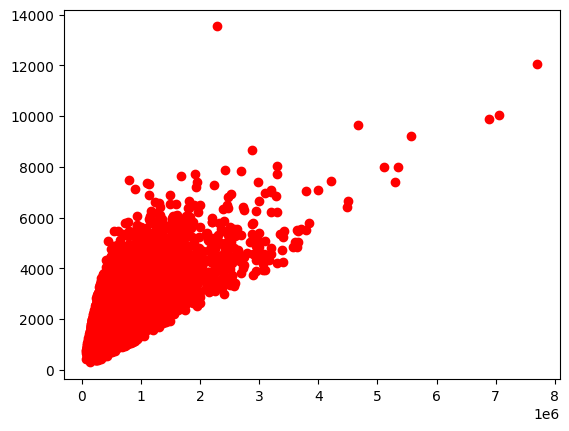

In [5]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linregv as l

# Manipulando los datos.

# Precios.
X = data[:,2]

# Sqft_living.
y = data[:,5]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((len(X), 1))
y = y.reshape((len(y), 1))

print("Precios: ", X)
print("Sqft_living", y)

# Calculando Xr.
Xr = np.hstack((
    np.ones((len(X), 1)),
    X.reshape((len(X), 1))
))

# Haciendo reshape a Xr.
Xr = Xr.reshape((len(Xr), 2))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regressionv(
    Xr,
    y.reshape((len(y), 1)),
    to,
    q.cost,
    q.grad,
    a=0.05,
    n=100
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))


ym = xmr @ tf # Pendiente de la recta a utilizar.

# Graficando los resultados.
plt.plot(Xr[:, 1], y, "ro")
plt.plot(xm, ym)
plt.show()

# Task 1.4: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

In [6]:
# Guardando los datos de prueba y entrenamiento en dos variables diferentes.

# Precios.
X = data[:,2]

# Sqft_living.
y = data[:,5]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]


# Dividiendo los datos de prueba y entrenamiento.
n_train = int(len(X) * 0.7) # Conjunto de entrenamiento.
x_train, y_train = X[:n_train], y[:n_train]
x_test, y_test = X[n_train:], y[n_train:]

# Definiendo los grados de los polinomios que se quiere probar.
degrees = range(1, 8)

# Creando variabes para guardar los errores del cross-validation.
train_errors = np.zeros(len(degrees))
test_errors = np.zeros(len(degrees))

# Realizando el cross validation.
for i, degree in enumerate(degrees):
    # Entrenar modelo de regresión polinómica
    X_train = np.vander(x_train, degree + 1, increasing=True)
    beta = np.linalg.lstsq(X_train, y_train, rcond=None)[0]

    # Calculando los errores de cross-validation.
    train_errors_k = []
    test_errors_k = []

    for k in range(n_train):

        X_val = np.vander(x_train, degree + 1, increasing=True)
        y_val = y_train[k]
        #print("y_val", y_val)
        train_errors_k.append(np.dot(X_val, beta)**2)

        for k in range(len(x_test)):
            X_val = np.vander(x_train, degree + 1, increasing=True)
            y_val = y_test[k]
            #print("y_val", y_val)
            test_errors_k.append(np.dot(X_val, beta)**2)
        
        train_errors[i] = np.mean(train_errors_k)
        test_errors[i] = np.mean(test_errors_k)

# Seleccionando el grado de polinomio que minimiza el error de cross-validation.
best_degree = degrees(np.argmin(test_errors))

# Entrenando el modelo final de regresión polinómica.
x = np.vander(X, best_degree + 1, increasing=True)
beta = np.linalg.lstsq(X_train, y_train, rcond=None)[0]

# Evaluando el rendimienot del modelo final usando datos de prueba.
y_pred = np.dot(x, beta)
mse = np.mean((y_pred - len(y)) ** 2)

# Visualizando los datos.
plt.scatter(x_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(x_test, y_test, color='green', label='Prueba')
plt.plot(x, y_pred, color='red', label='Modelo final')
plt.legend()
plt.show()
